In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-probability-of-default/Bank.xlsx


In [2]:
df = pd.read_excel('/kaggle/input/bank-probability-of-default/Bank.xlsx')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,loan_applicant_id,age,education,years_with_current_employer,years_at_current_address,household_income,debt_to_income_ratio,credit_card_debt,other_debt,y
0,191,44,university.degree,10,20,192,12.116645,14.377313,8.886645,1
1,34318,34,high.school,3,18,57,14.264229,5.137880,2.992730,0
2,14932,45,university.degree,14,24,212,7.285681,10.460306,4.985339,0
3,2776,33,illiterate,12,5,418,11.386272,3.040189,44.554429,1
4,11915,20,basic,4,19,122,28.418494,14.560450,20.110112,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   loan_applicant_id            41188 non-null  int64  
 1   age                          41188 non-null  int64  
 2   education                    41188 non-null  object 
 3   years_with_current_employer  41188 non-null  int64  
 4   years_at_current_address     41188 non-null  int64  
 5   household_income             41188 non-null  int64  
 6   debt_to_income_ratio         41188 non-null  float64
 7   credit_card_debt             41188 non-null  float64
 8   other_debt                   41188 non-null  float64
 9   y                            41188 non-null  int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 3.1+ MB


For estimation of the model, we are going to build a separate indicator variable (or "dummy variable") that shows if an individual has each education level (value of 1) or not (value of zero).

In [4]:
df = pd.get_dummies(df, columns=["education"], prefix="education", dtype=int)
df

,loan_applicant_id,age,years_with_current_employer,years_at_current_address,household_income,debt_to_income_ratio,credit_card_debt,other_debt,y,education_basic,education_high.school,education_illiterate,education_professional.course,education_university.degree
0,191,44,10,20,192,12.116645,14.377313,8.886645,1,0,0,0,0,1
1,34318,34,3,18,57,14.264229,5.137880,2.992730,0,0,1,0,0,0
2,14932,45,14,24,212,7.285681,10.460306,4.985339,0,0,0,0,0,1
3,2776,33,12,5,418,11.386272,3.040189,44.554429,1,0,0,1,0,0
4,11915,20,4,19,122,28.418494,14.560450,20.110112,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,33354,49,4,4,114,12.296137,4.868954,9.148643,0,0,1,0,0,0
41184,38993,52,13,16,178,21.421341,23.210634,14.919353,0,0,0,0,1,0
41185,1765,42,18,15,264,9.821804,12.290464,13.639099,1,0,0,0,0,1
41186,32593,21,12,24,56,23.998647,8.108453,5.330789,0,0,0,0,0,1


In [5]:
df.drop(['loan_applicant_id'], axis=1, inplace = True)

In [6]:
X = df.iloc[:,df.columns != 'y']
y = df.iloc[:,df.columns == 'y']
print(X.shape, y.shape)

(41188, 12) (41188, 1)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=int(len(y)*0.5), shuffle=False)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(20594, 12) (20594, 12) (20594, 1) (20594, 1)


In [8]:
print(df['y'].value_counts())

y
0    36548
1     4640
Name: count, dtype: int64


In [9]:
print('percentage of default: ', 
      100 * df['y'].value_counts()[1]/(df['y'].value_counts()[0]+df['y'].value_counts()[1]))

percentage of default:  11.26541711178013


In [10]:
X.describe()

,age,years_with_current_employer,years_at_current_address,household_income,debt_to_income_ratio,credit_card_debt,other_debt,education_basic,education_high.school,education_illiterate,education_professional.course,education_university.degree
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,38.007842,13.549869,15.385331,139.707366,16.224054,9.577260,13.758168,0.199524,0.198043,0.198602,0.199864,0.203967
std,10.623627,8.145105,9.184471,81.688037,9.191426,12.408628,14.596510,0.399648,0.398530,0.398952,0.399903,0.402950
min,20.000000,0.000000,0.000000,14.000000,0.400386,0.005668,0.021759,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,6.000000,7.000000,74.000000,8.452497,1.853292,3.783906,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,14.000000,15.000000,134.000000,16.105334,5.311447,9.153871,0.000000,0.000000,0.000000,0.000000,0.000000
75%,47.000000,21.000000,23.000000,196.000000,23.730786,12.636789,18.906855,0.000000,0.000000,0.000000,0.000000,0.000000
max,56.000000,29.000000,31.000000,446.000000,41.293984,149.015859,159.198221,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
print(X.skew())

age                              0.002447
years_with_current_employer      0.014698
years_at_current_address         0.004061
household_income                 0.759520
debt_to_income_ratio             0.147856
credit_card_debt                 3.279096
other_debt                       2.558272
education_basic                  1.503777
education_high.school            1.515428
education_illiterate             1.511024
education_professional.course    1.501117
education_university.degree      1.469400
dtype: float64


In [12]:
print(X.kurt())

age                              -1.205963
years_with_current_employer      -1.191823
years_at_current_address         -1.198518
household_income                  0.910701
debt_to_income_ratio             -0.874766
credit_card_debt                 16.974074
other_debt                       10.951167
education_basic                   0.261359
education_high.school             0.296537
education_illiterate              0.283207
education_professional.course     0.253365
education_university.degree       0.159144
dtype: float64


Let's visualize the different aspects of the distributions of each input feature to have a better understanding of the data and explore which variables are more related to default. We are going to plot the distributions of each variable on the same scale.

On top of the standardization, we plot the distribution of each variable separately for those instances where we observe a default and where we do not observe it. Notice in the figure below that four variables display the most significant differences in their distributions between non-defaulting and defaulting individuals: household income, debt-to-income ratio, credit card debt, and other debt. As suggested by the descriptive statistics shown above, the level of credit card debt and other types of debt include individuals with very extreme values.

Notice also that the education attained is does not seem relevant as a default predictor since all the distributions are more or less similar across all education levels. Given this observation we may opt to exclude these variables from our model since they seem to provide little predictive ability compared to the other features. However, we should keep in mind also that there may be relevant non-linear interactions among variables that may help to predict the outcome of interest, despite seeming individually irrelevant at first. Although our Logistic Regression model will ignore the interactions between variables, we should take into account this possibility in more advanced ML models.

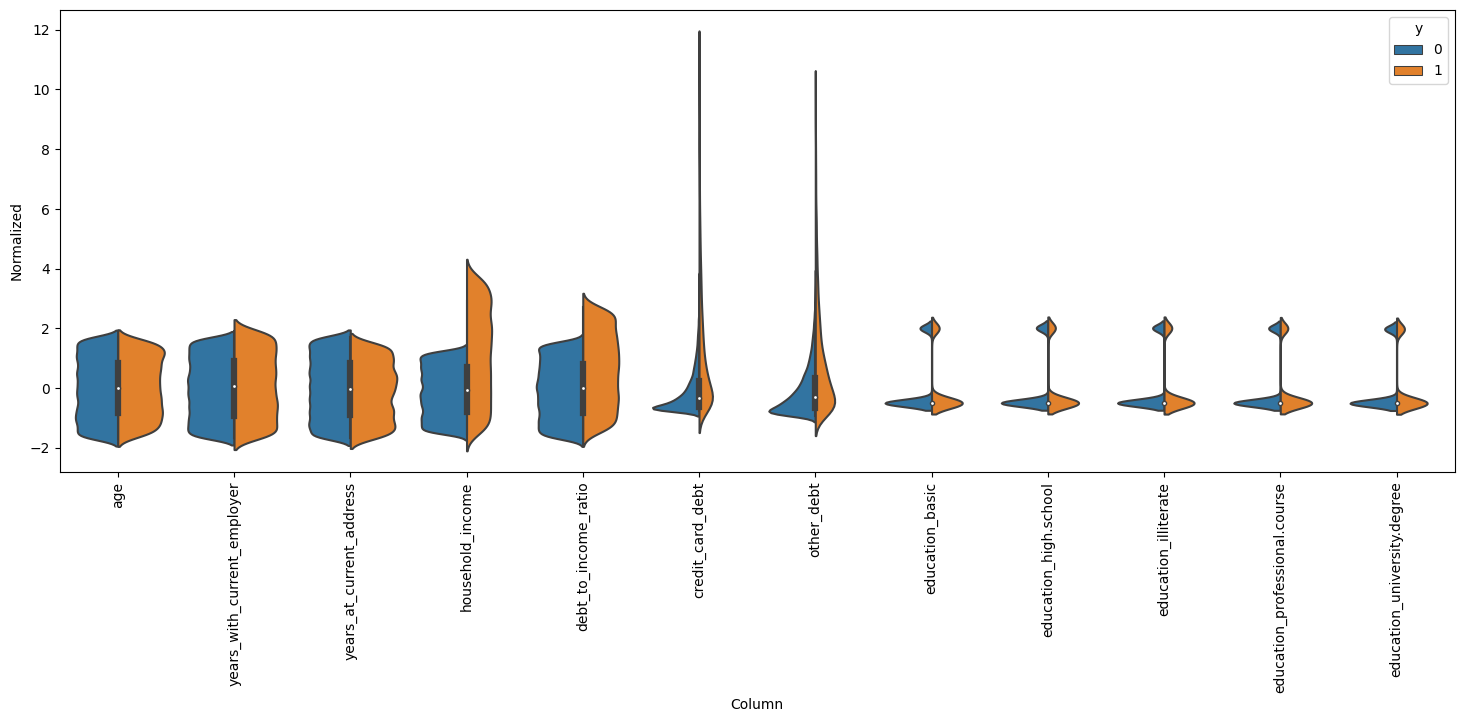

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

X_mean = X.mean()
X_std = X.std()
X_std = (X - X_mean)/X_std
X_std['y'] = y
X_std = X_std.melt(id_vars=['y'], var_name='Column',value_name='Normalized')
plt.figure(figsize=(18,6))
ax = sns.violinplot(data=X_std, x="Column", y="Normalized", hue="y", split=True)
_ = ax.set_xticklabels(X_train.keys(), rotation=90)

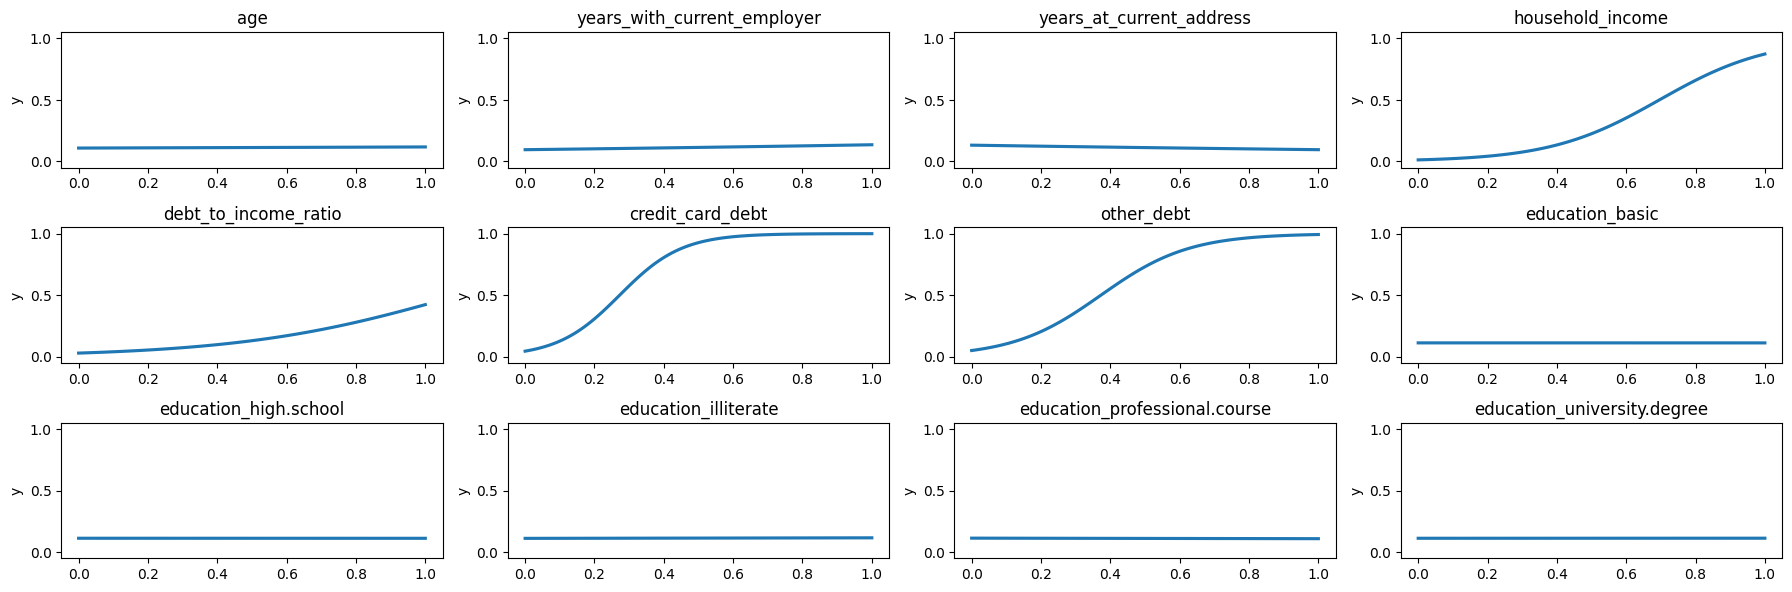

In [14]:
X_minmax = (X-X.min()) / (X.max() - X.min())
X_minmax['y'] = y
plt.figure(figsize=(18, 6))
g = 1
for colname in X:
    plt.subplot(3, 4, g)
    sns.regplot(
        x=colname,
        y="y",
        data=X_minmax,
        marker="",
        logistic=True,
        fit_reg=True,
        ci=None,
        label=colname,
    )
    plt.title(colname, fontsize="large")
    plt.xlabel("")
    g += 1

fig = plt.gcf()
fig.tight_layout(pad=1.0)
plt.show()

In [15]:
X.corr()

,age,years_with_current_employer,years_at_current_address,household_income,debt_to_income_ratio,credit_card_debt,other_debt,education_basic,education_high.school,education_illiterate,education_professional.course,education_university.degree
age,1.000000,0.003541,-0.000792,0.012941,0.002368,0.006742,0.008382,-0.003840,0.000901,0.000125,0.006015,-0.003176
years_with_current_employer,0.003541,1.000000,0.003735,0.017895,0.015861,0.021350,0.019016,-0.005973,0.002197,-0.004079,0.005609,0.002223
years_at_current_address,-0.000792,0.003735,1.000000,-0.015017,-0.016278,-0.016825,-0.015577,-0.000705,-0.003808,0.002134,-0.004052,0.006376
household_income,0.012941,0.017895,-0.015017,1.000000,0.089134,0.570904,0.602902,-0.000379,-0.000497,0.001665,-0.009651,0.008798
debt_to_income_ratio,0.002368,0.015861,-0.016278,0.089134,1.000000,0.512834,0.587590,0.001945,-0.001682,0.002517,-0.004673,0.001881
credit_card_debt,0.006742,0.021350,-0.016825,0.570904,0.512834,1.000000,0.381699,0.001841,-0.002588,0.002742,-0.009434,0.007381
other_debt,0.008382,0.019016,-0.015577,0.602902,0.587590,0.381699,1.000000,-0.006141,0.000275,0.006983,-0.007343,0.006193
education_basic,-0.003840,-0.005973,-0.000705,-0.000379,0.001945,0.001841,-0.006141,1.000000,-0.248101,-0.248537,-0.249522,-0.252719
education_high.school,0.000901,0.002197,-0.003808,-0.000497,-0.001682,-0.002588,0.000275,-0.248101,1.000000,-0.247384,-0.248365,-0.251547
education_illiterate,0.000125,-0.004079,0.002134,0.001665,0.002517,0.002742,0.006983,-0.248537,-0.247384,1.000000,-0.248801,-0.251989


In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler_input = MinMaxScaler(feature_range=(-1, 1))
scaler_input.fit(X_train)
X_train = scaler_input.transform(X_train)
X_test = scaler_input.transform(X_test)

## Logistic Model

In [17]:
from sklearn.linear_model import LogisticRegression

# parameters not specified, all are set to their defaults
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [18]:
print(logisticRegr.intercept_)
for cc in range(len(X.keys())):
    print(X.keys()[cc], logisticRegr.coef_[0, cc])

[-3.12046985]
age 0.010934712259795474
years_with_current_employer 0.20433293062726418
years_at_current_address -0.17321938387061117
household_income 4.031457477177732
debt_to_income_ratio 2.3873139210745644
credit_card_debt -0.5761309192188838
other_debt -2.4904315008537856
education_basic -0.02730257179071413
education_high.school -0.009627246779449102
education_illiterate 0.013256585706542342
education_professional.course -0.009054332294192823
education_university.degree 0.026745014437371668


In [19]:
predictions = logisticRegr.predict(X_test)

In [20]:
score = logisticRegr.score(X_test, y_test)
print(score)

0.9247353598135379


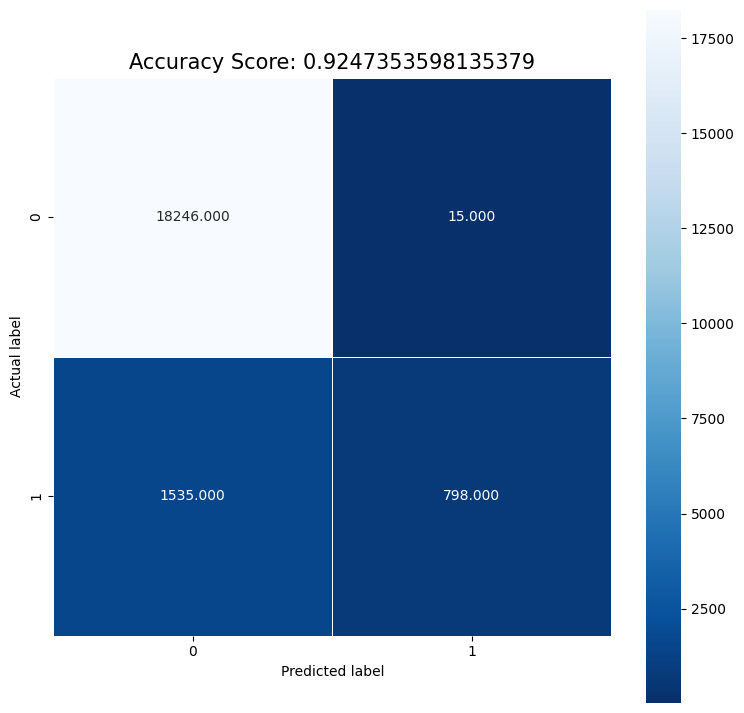

In [21]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=0.5, square=True, cmap="Blues_r")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
all_sample_title = "Accuracy Score: {0}".format(score)
plt.title(all_sample_title, size=15);

In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     18261
           1       0.98      0.34      0.51      2333

    accuracy                           0.92     20594
   macro avg       0.95      0.67      0.73     20594
weighted avg       0.93      0.92      0.91     20594



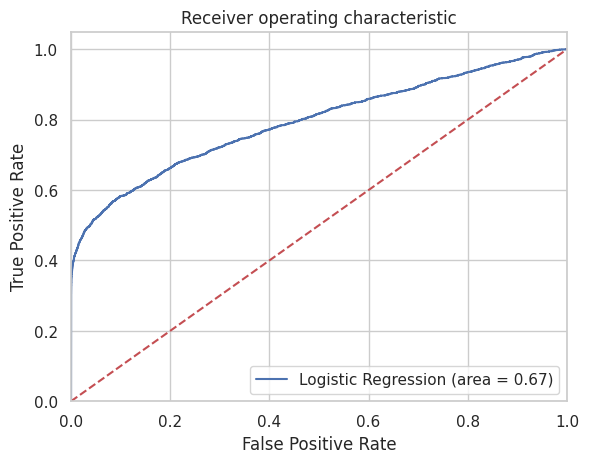

In [23]:
from sklearn.metrics import roc_auc_score, roc_curve

sns.set(style="whitegrid", color_codes=True)
logit_roc_auc = roc_auc_score(y_test, logisticRegr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logisticRegr.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [24]:
Xpoly = X
for pp in range(2, 6):
    Xpoly = np.concatenate((Xpoly, np.power(X, pp)), axis=1)
X_train, X_test, y_train, y_test = train_test_split(Xpoly, y, test_size=int(len(y) * 0.5), shuffle=False)

In [25]:
# Set up Logistic Regression
logisticRegr = LogisticRegression(C=2.5, max_iter=500)
logisticRegr.fit(X_train, y_train)
print(logisticRegr.intercept_)
print(logisticRegr.coef_)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[-3.28036309e-14]
[[-9.00611178e-13 -4.06659065e-13 -4.67549347e-13 -1.70745278e-12
  -4.62513150e-13 -6.09629534e-14 -1.64705430e-13 -7.22310754e-15
  -6.01399486e-15 -6.49216942e-15 -6.81688114e-15 -6.25747790e-15
  -2.44737233e-11 -6.87656978e-12 -9.34773853e-12 -9.40769536e-11
  -8.08189969e-12  3.26269968e-13 -1.29717694e-12 -7.22310754e-15
  -6.01399486e-15 -6.49216942e-15 -6.81688114e-15 -6.25747790e-15
  -6.21377264e-10 -1.30278534e-10 -2.14738418e-10 -4.06318163e-09
  -1.35214591e-10  1.67493554e-11 -9.50906645e-12 -7.22310754e-15
  -6.01399486e-15 -6.49216942e-15 -6.81688114e-15 -6.25747790e-15
  -1.23984185e-08 -2.61597813e-09 -5.33852188e-09 -1.02256635e-08
  -1.48416590e-09  4.35612506e-10 -2.01252466e-13 -7.22310754e-15
  -6.01399486e-15 -6.49216942e-15 -6.81688114e-15 -6.25747790e-15
  -6.13837454e-09 -5.41643196e-08 -1.39598087e-07  4.17152467e-11
   2.81060688e-08  1.03722141e-08  2.11899918e-09 -7.22310754e-15
  -6.01399486e-15 -6.49216942e-15 -6.81688114e-15 -6.25747

In [26]:
predictions = logisticRegr.predict(X_test)
score = logisticRegr.score(X_test, y_test)
print(score)

0.9312906671846168


              precision    recall  f1-score   support

           0       0.94      0.98      0.96     18261
           1       0.80      0.52      0.63      2333

    accuracy                           0.93     20594
   macro avg       0.87      0.75      0.80     20594
weighted avg       0.93      0.93      0.92     20594



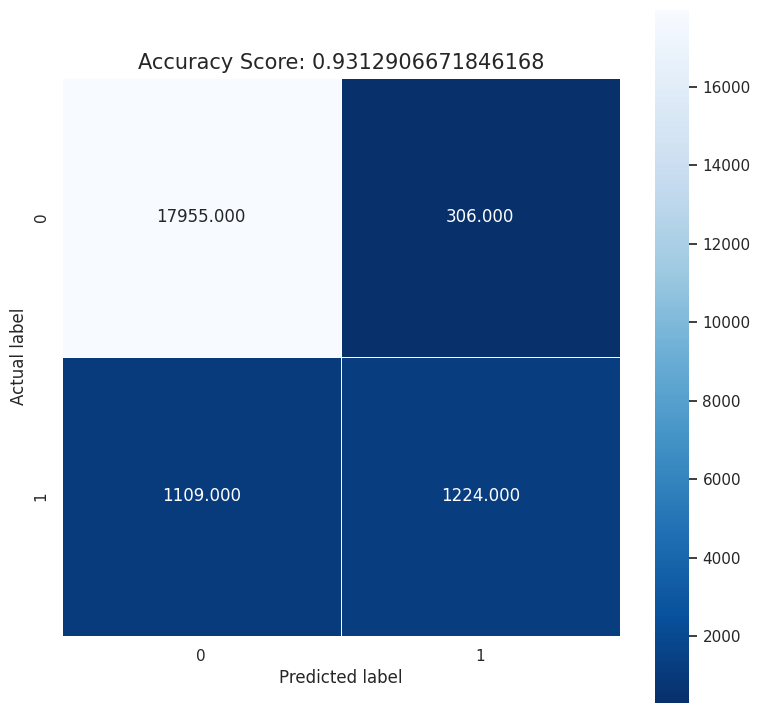

In [27]:
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=0.5, square=True, cmap="Blues_r")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
all_sample_title = "Accuracy Score: {0}".format(score)
plt.title(all_sample_title, size=15)
print(classification_report(y_test, predictions))

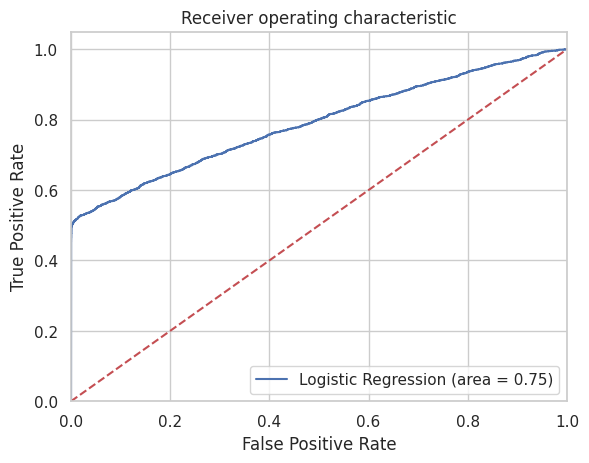

In [28]:
logit_roc_auc = roc_auc_score(y_test, logisticRegr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logisticRegr.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()